# Select events and compute maps for run 7439

## Scope 

- This NB selects events and computes XY maps for run 7439.

- Run 7439. August 2019. HE run. 


### Author:  JJGC

### Software: KrCalib : https://github.com/nextic/ICAROS/

## Imports

In [2]:
import time
import os
print("Last updated on ", time.asctime())

Last updated on  Tue Aug 20 17:25:36 2019


In [78]:
run_number  = 7439
file_range  = 0, 8953

input_path  = f"$IC_DATA/kdst"
output_path = f"$IC_DATA/dst"
log_path    = f"$IC_DATA/log"
trigger     = 'trigger1'
tags        = 'v1.1.0_20190801_krbg'

emap_filename   = os.path.expandvars(f'$IC_DATA/maps/kr_emap_xy_100_100_r_{run_number}.h5')
emap_filename2   = os.path.expandvars(f'$IC_DATA/maps/kr_emap_xy_50_50_r_{run_number}.h5')
write_filtered_dst = True

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [5]:
import sys
import time
import datetime 
import numpy as np
import pandas as pd
import tables            as tb
import random
import glob
import warnings
import seaborn as sns
sns.set()

In [6]:
from numpy import pi, sqrt

In [7]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units

In [8]:
import krcal.dev.corrections                  as corrections 
import krcal.utils.hst_extend_functions       as hst
from krcal.core import fit_functions_ic       as fitf
import invisible_cities.reco.corrections      as corrf

In [11]:
from krcal.core.core_functions                import time_delta_from_time
from krcal.core.core_functions                import phirad_to_deg
from krcal.core.core_functions                import NN
from krcal.core.core_functions                import timeit
from krcal.core.core_functions                import data_frames_are_identical

from krcal.core.io_functions                  import filenames_from_paths
from krcal.core.io_functions                  import filenames_from_list
from krcal.core.io_functions                  import kdst_write
from krcal.core.io_functions                  import write_maps
from krcal.core.io_functions                  import read_maps
from krcal.core.io_functions                  import write_maps_ts
from krcal.core.io_functions                  import read_maps_ts

from krcal.core.ranges_and_bins_functions     import kr_ranges_and_bins

from krcal.core.histo_functions               import h1, h1d, h2, h2d, profile1d, plot_histo
from krcal.core.kr_types                      import PlotLabels, FitType

from krcal.core.s1s2_functions                import s1d_from_dst
from krcal.core.s1s2_functions                import s2d_from_dst
from krcal.core.s1s2_functions                import plot_s1histos
from krcal.core.s1s2_functions                import plot_s2histos
from krcal.core.s1s2_functions                import energy_time_profile
from krcal.core.s1s2_functions                import energy_X_profile

from krcal.core.plt_functions                 import plot_xy_density
from krcal.core.plt_functions                 import plot_s1_vs_z
from krcal.core.plt_functions                 import plot_s2_vs_z
from krcal.core.plt_functions                 import plot_s2_vs_s1
from krcal.core.plt_functions                 import plot_q_vs_s2
from krcal.core.plt_functions                 import plot_energy_distributions
from krcal.core.plt_functions                 import plot_energy_vs_t

from krcal.core.selection_functions           import event_map_df
from krcal.core.selection_functions           import select_rphi_sectors_df
from krcal.core.selection_functions           import select_xy_sectors_df
from krcal.core.selection_functions           import get_time_series_df
from krcal.core.fitmap_functions              import time_fcs_df
from krcal.core.fitmap_functions              import fit_fcs_in_rphi_sectors_df
from krcal.core.fitmap_functions              import fit_map_xy_df

from krcal.core.map_functions                 import tsmap_from_fmap
from krcal.core.map_functions                 import amap_from_tsmap
from krcal.core.map_functions                 import relative_errors
from krcal.core.map_functions                 import amap_average
from krcal.core.map_functions                 import amap_max
from krcal.core.map_functions                 import amap_min
from krcal.core.map_functions                 import amap_replace_nan_by_mean
from krcal.core.map_functions                 import amap_replace_nan_by_zero
from krcal.core.map_functions                 import regularize_maps
from krcal.core.map_functions                 import get_maps_from_tsmap
from krcal.core.map_functions                 import map_average
from krcal.core.map_functions                 import add_mapinfo

from krcal.core.xy_maps_functions             import draw_xy_maps
from krcal.core.xy_maps_functions             import draw_xy_map
from krcal.core.xy_maps_functions             import draw_xy_maps_ts

from krcal.core.rphi_maps_functions           import draw_rphi_maps
from krcal.core.rphi_maps_functions           import draw_rphi_map
from krcal.core.rphi_maps_functions           import draw_rphi_maps_ts
from krcal.core.rphi_maps_functions           import draw_wedges
from krcal.core.rphi_maps_functions           import define_rphi_sectors
from krcal.core.rphi_maps_functions           import rphi_sector_map_def

from krcal.core.correction_functions          import e0_rphi_correction
from krcal.core.correction_functions          import e0_xy_correction
from krcal.core.correction_functions          import lt_xy_correction
from krcal.core.correction_functions          import e0_xy_correction_ts
from krcal.core.correction_functions          import lt_xy_correction_ts
from krcal.core.correction_functions          import lt_rphi_correction
from krcal.core.correction_functions          import lt_rphi_correction_ts
from krcal.core.correction_functions          import e0_rphi_correction_ts
from krcal.core.correction_functions          import e0_rphi_correction_ts

from krcal.core.fit_lt_histograms             import plot_time_fcs
from krcal.core.fit_energy_functions          import fit_energy
from krcal.core.fit_energy_functions          import plot_fit_energy
from krcal.core.fit_energy_functions          import print_fit_energy
from krcal.core.fit_energy_functions          import resolution_r_z
from krcal.core.fit_energy_functions          import plot_resolution_r_z

from krcal.core.selection_functions           import selection_info
from krcal.core.selection_functions           import selection_in_band
from krcal.core.selection_functions           import plot_selection_in_band

### Logger

### Logger


- CRITICAL
- ERROR
- WARNING
- INFO
- DEBUG



In [12]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')
log = logging.getLogger()

2019-08-20 17:26:48,615 | INFO : Hello world!


### Input/output 

In [13]:
input_dst_filenames, output_dst_filename, log_filename = filenames_from_paths(run_number,
                                                                              input_path,
                                                                              output_path,
                                                                              log_path,
                                                                              trigger,
                                                                              tags,
                                                                              file_range)
                                                                              
print(f'input dsts:\n first = {input_dst_filenames[0]}\n last = {input_dst_filenames[-1]}')
print(f"output dst = {output_dst_filename}")
print(f"log file   = {log_filename}")                       

input dsts:
 first = /Users/jjgomezcadenas/Projects/ICDATA/kdst/7439/kdst_0000_7439_trigger1_v1.1.0_20190801_krbg.h5
 last = /Users/jjgomezcadenas/Projects/ICDATA/kdst/7439/kdst_8952_7439_trigger1_v1.1.0_20190801_krbg.h5
output dst = /Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7439_trigger1_0000_8952.h5
log file   = /Users/jjgomezcadenas/Projects/ICDATA/log/log_7439_trigger1_0000_8952.h5


In [14]:
dst_full           = load_dsts(input_dst_filenames, "DST", "Events")

In [15]:
unique_events = ~dst_full.event.duplicated()

number_of_S2s_full  = np.size         (unique_events)
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of S2s   : {number_of_S2s_full} ")
print(f"Total number of events: {number_of_evts_full}")

Total number of S2s   : 3502664 
Total number of events: 1752758


In [16]:
dst_full.columns

Index(['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h',
       'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT', 'Z',
       'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

In [17]:
ntot = len(dst_full)
print(f"length of dst = {ntot}")

length of dst = 3502664


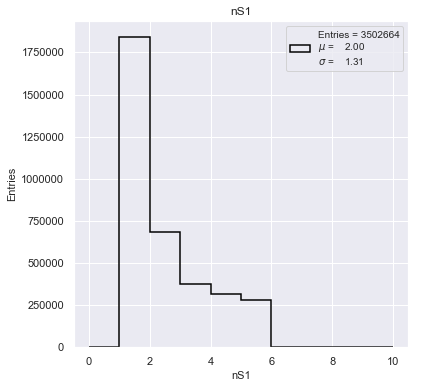

In [18]:
n, b, _, _ = h1d(dst_full.nS1.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS1', y='Entries', title='nS1'))

In [19]:
fnS1 = n[n.argmax()]/np.sum(n)
print(f'fraction of S1s = {fnS1}')

fraction of S1s = 0.5263350980853431


In [20]:
dst1s1 = dst_full[in_range(dst_full.nS1, 1,2)]

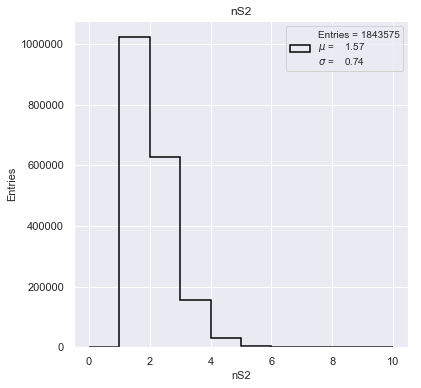

In [21]:
n, b, _, _ = h1d(dst1s1.nS2.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS2', y='Entries', title='nS2'))

In [22]:
fnS2 = n[n.argmax()]/np.sum(n)
print(f'fraction of S2s = {fnS2}')

fraction of S2s = 0.5556155838520266


In [23]:
dst    = dst1s1[in_range(dst1s1.nS2, 1, 2)]

In [24]:
n_full   = len(dst)
eff = n_full   / ntot 
print(f"Total number of events with 1 s1 and 1 s2 : {n_full}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 : 1024319: selection eff = 0.29243998282450157 


In [25]:
s1d = s1d_from_dst(dst)

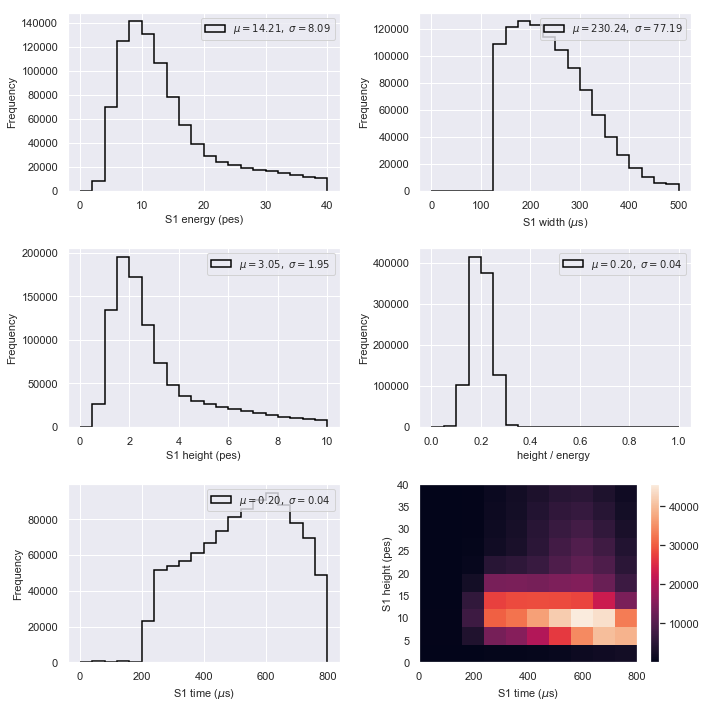

In [26]:
plot_s1histos(dst,  s1d, bins=20, figsize=(10,10))

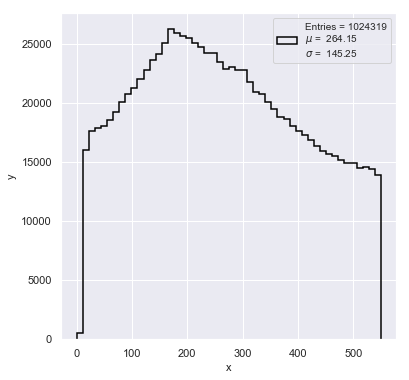

In [27]:
(_) = h1d(dst.Z, bins = 50, range =(0,550))

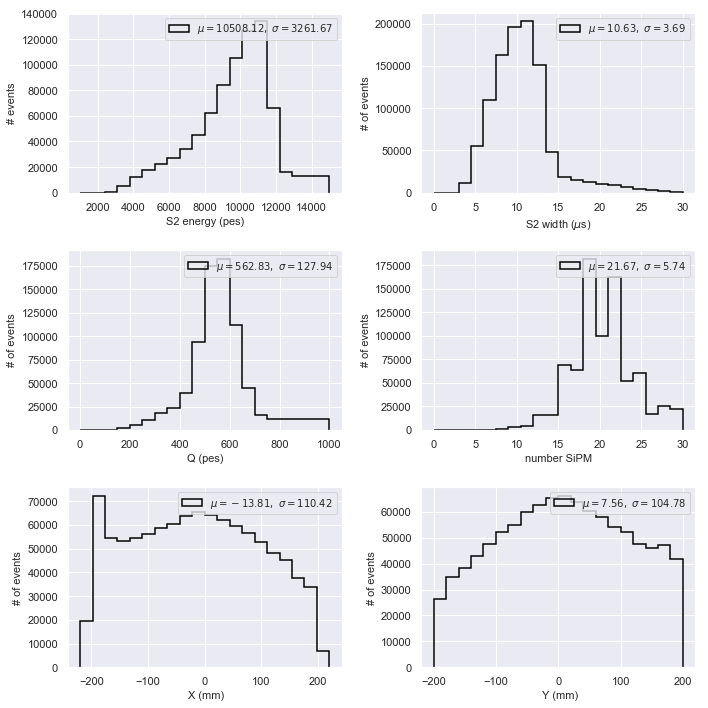

In [28]:
s2d = s2d_from_dst(dst)
plot_s2histos(dst, s2d, bins=20, emin=1000, emax=15000, figsize=(10,10))

### Ranges and binning

In [29]:
RMAX      = 200
RFID      = 180
RCORE     = 100
s1e_range = (3, 25)
s2e_range = (2000, 18000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range = (5000, 18000)
lt_range = (1000, 9000)
c2_range = (0,5)
time_bins = 1

## 50 x 50 bins for map

In [30]:
krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 50,
                                                        ynbins    = 50,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [31]:
krRanges

KrRanges(S2e=(2000, 18000), S1e=(3, 25), S2q=(200, 800), X=(-200, 200), Y=(-200, 200), Z=(10, 550), T=(1566040966.953, 1566128490.878))

In [32]:
krNbins

KrNBins(S2e=25, S1e=10, S2q=25, X=50, Y=50, Xsi=50, Ysi=50, Z=15, T=24)

### Sort DST in time and add DT column (DT is a vector of time differences)

In [33]:
dstx     = dst[in_range(dst.X, -RMAX, RMAX)]
dst      = dstx[in_range(dstx.Y, -RMAX, RMAX)]
dst_time = dst.sort_values('time')
T       = dst_time.time.values
DT      = time_delta_from_time(T)
dst = dst.assign(DT=DT)
dst.columns

Index(['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h',
       'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT', 'Z',
       'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

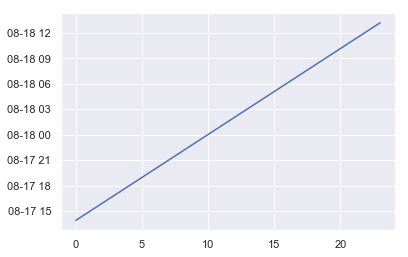

In [34]:
plt.plot(krTimes.timeStamps)

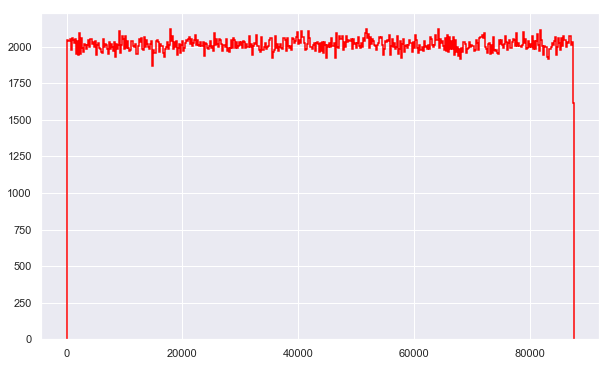

In [35]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(dst.DT.values, bins=500, range = (dst.DT.values[0], dst.DT.values[-1]), color='red', stats=False, lbl='pre-sel')

### Event distribution

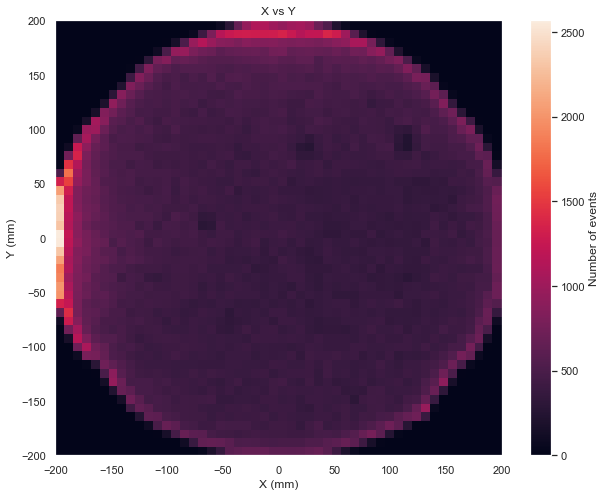

In [36]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, (-200,200), (-200,200), 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

In [314]:
emap_filename

'/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_emap_xy_100_100_r_7439.h5'

In [37]:
bootstrap_corr_f   =emap_filename
write_filtered_dst = True
print(bootstrap_corr_f)
emaps = read_maps(filename=bootstrap_corr_f)
norm = amap_max(emaps)
norm

/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_emap_xy_100_100_r_7439.h5


ASectorMap(chi2=3.2363782362084965, e0=12646.619870064445, lt=11627.746602188212, e0u=0.7482773902330715, ltu=14.88768408290421, mapinfo=None)

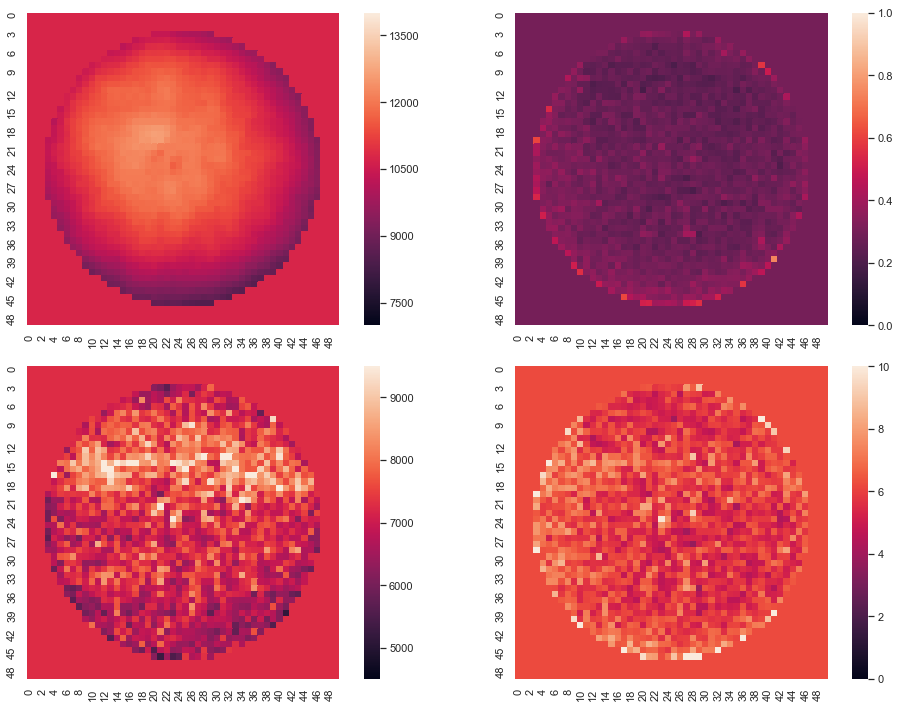

In [38]:
draw_xy_maps(emaps,
            e0lims  = (7000, 14000),
            ltlims  = (4500, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

In [39]:
ti = timeit(e0_xy_correction)
E0 = ti(dst.S2e.values,
        dst.X.values,
        dst.Y.values,
        E0M = emaps.e0 / norm.e0, 
        xr  = krRanges.X,
        yr  = krRanges.Y,
        nx  = krNbins.X, 
        ny  = krNbins.Y)

Time spent in e0_xy_correction: 8.758306980133057 s


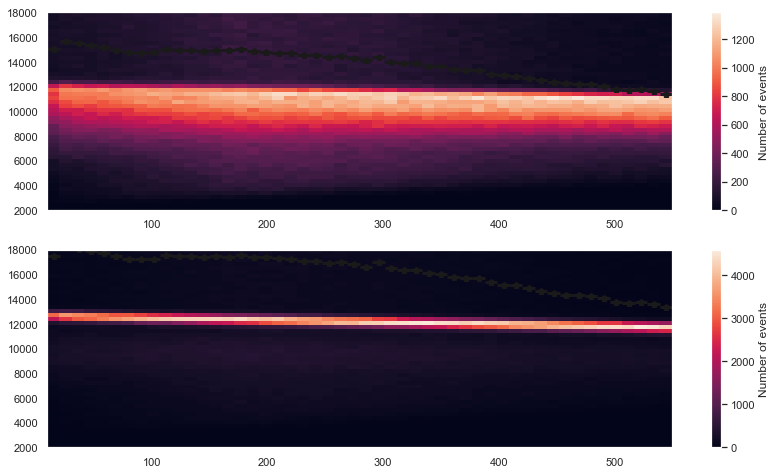

In [40]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(2, 1, 1)
nevt = h2(dst.Z, dst.S2e, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)
ax      = fig.add_subplot(2, 1, 2)
nevt = h2(dst.Z, E0, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)

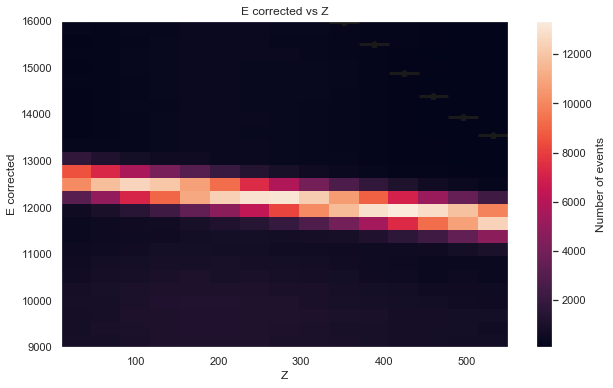

In [41]:
nevt = h2d(dst.Z, E0, krNbins.Z, krNbins.S2e, krRanges.Z, (9000,16000), 
           pltLabels=PlotLabels(x='Z', y='E corrected', title='E corrected vs Z'),
           profile=True,
           figsize=(10,6))

In [42]:

range_krs2 = (10.0e+3,14e+3)
sel_krband, fpl, fph, hp, pp = selection_in_band(dst.Z, E0,
                                                 range_z = krRanges.Z,
                                                 range_e = range_krs2,
                                                 nbins_z = 50,
                                                 nbins_e = 50,
                                                 nsigma  = 3.5)

/Users/jjgomezcadenas/Projects/KrCalib2/krcal/core/fit_functions.py:45: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)
/Users/jjgomezcadenas/Projects/KrCalib2/krcal/core/fit_functions.py:45: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)


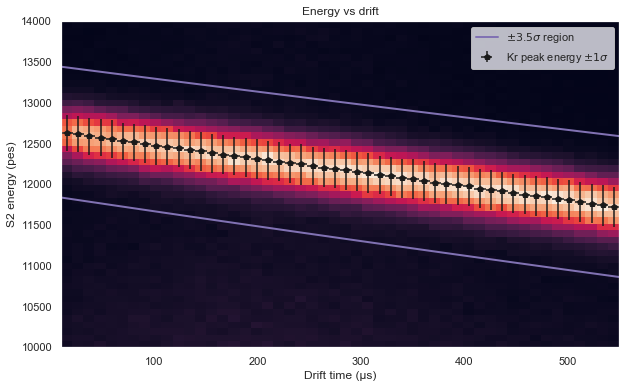

In [43]:

plot_selection_in_band(fpl, fph, hp, pp)

In [44]:
selection_info(sel_krband, 'Kr band')

Total number of selected candidates Kr band: 472518 (46.9 %)


'Total number of selected candidates Kr band: 472518 (46.9 %)'

In [45]:
dst = dst.assign(E0=E0)

In [46]:
dsts = dst[sel_krband]

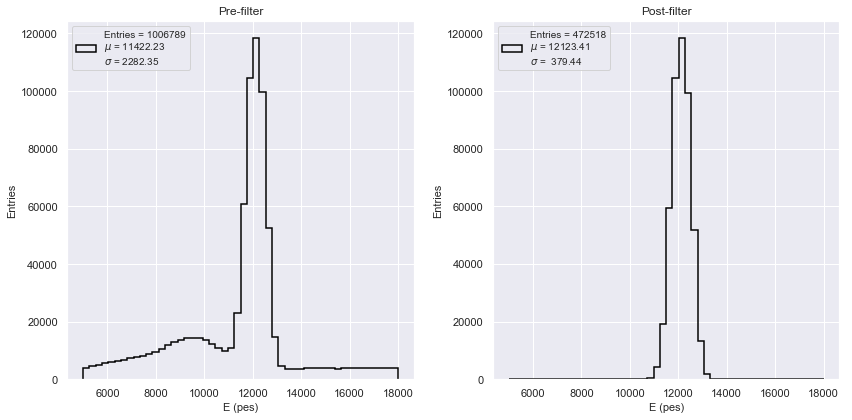

In [47]:
fig = plt.figure(figsize=(12,6))
ax      = fig.add_subplot(1, 2, 1)
(_)     = h1(dst.E0,  bins = 50, range =(5000,18000))
plot_histo(PlotLabels('E (pes)','Entries','Pre-filter'), ax, legendloc='upper left')
ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(dsts.E0,  bins = 50, range =(5000,18000))
plot_histo(PlotLabels('E (pes)','Entries','Post-filter'), ax, legendloc='upper left')
plt.tight_layout()

In [48]:
dstf = dsts[dsts.R <= RFID]

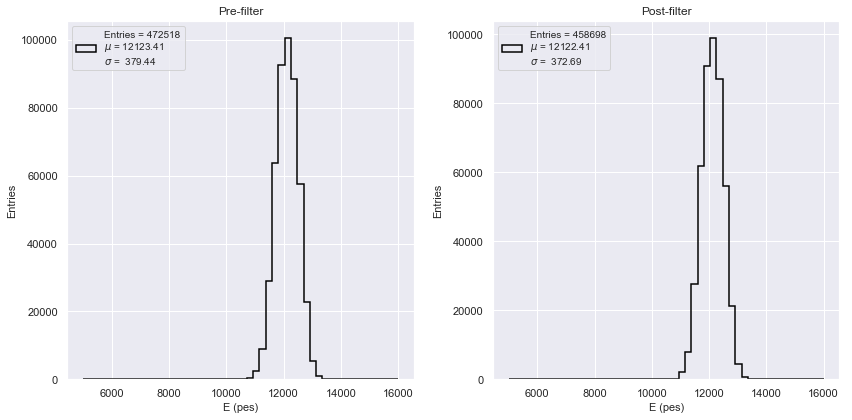

In [50]:
fig = plt.figure(figsize=(12,6))
ax      = fig.add_subplot(1, 2, 1)
(_)     = h1(dsts.E0,  bins = 50, range =(5000,16000))
plot_histo(PlotLabels('E (pes)','Entries','Pre-filter'), ax, legendloc='upper left')
ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(dstf.E0,  bins = 50, range =(5000,16000))
plot_histo(PlotLabels('E (pes)','Entries','Post-filter'), ax, legendloc='upper left')
plt.tight_layout()

## S1 & S2 distributions again

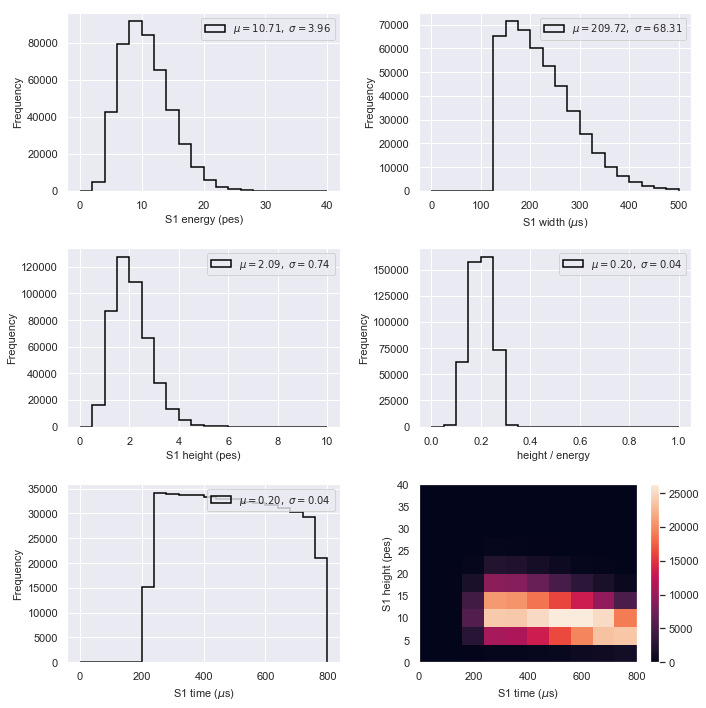

In [51]:
s1d = s1d_from_dst(dstf)
plot_s1histos(dstf,  s1d, bins=20, figsize=(10,10))

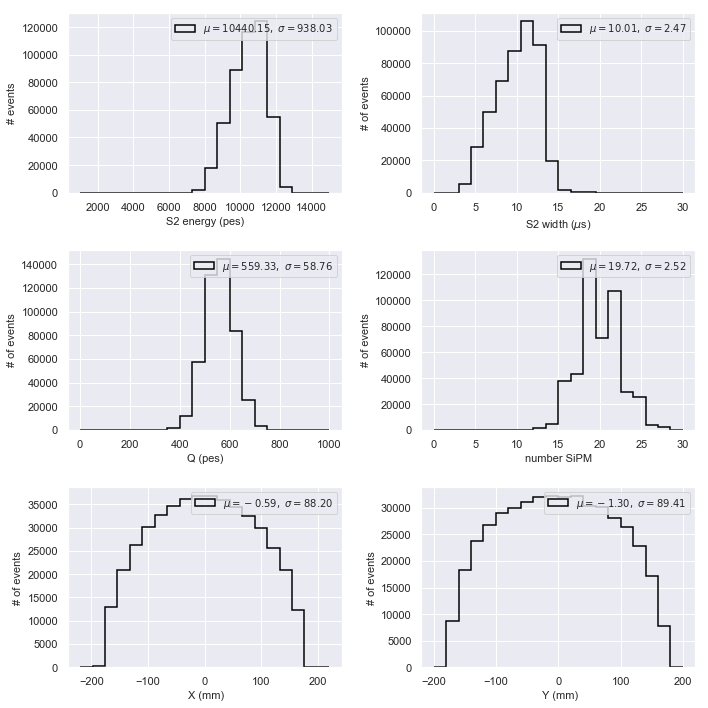

In [52]:
s2d = s2d_from_dst(dstf)
plot_s2histos(dstf, s2d, bins=20, emin=1000, emax=15000, figsize=(10,10))

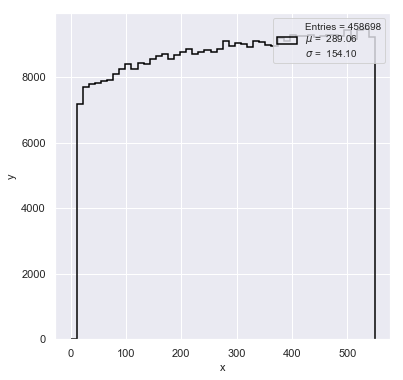

In [53]:
(_) = h1d(dstf.Z, bins = 50, range =(0,550))

In [54]:
def plot_energy_in_z_slices(zdata, edata, nbins_z, range_z, range_e):
    """
    Slice the data in z, histogram each slice, return mean and std of energy in that slice

    """
    zbins   = np.linspace(*range_z, nbins_z + 1)
    fig = plt.figure(figsize=(18,12))
    for i in range(nbins_z):
        ebin = np.array(edata[in_range(zdata, *zbins[i:i + 2])])
        ax      = fig.add_subplot(5, 3, i+1)
        (_)     = h1(ebin,  bins = nbins_z, range =range_e)
        plot_histo(PlotLabels('E (pes)','Entries','Pre-filter'), ax, legendloc='upper left')


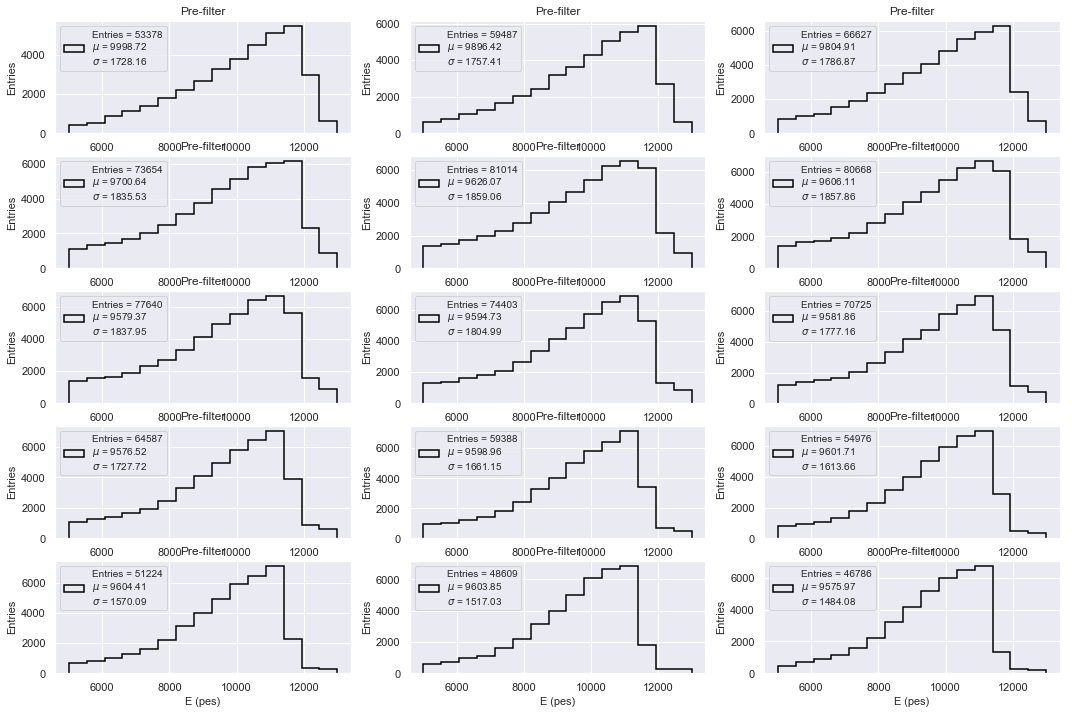

In [55]:
plot_energy_in_z_slices(dst.Z, dst.S2e, krNbins.Z, krRanges.Z, range_e=(5000, 13000))

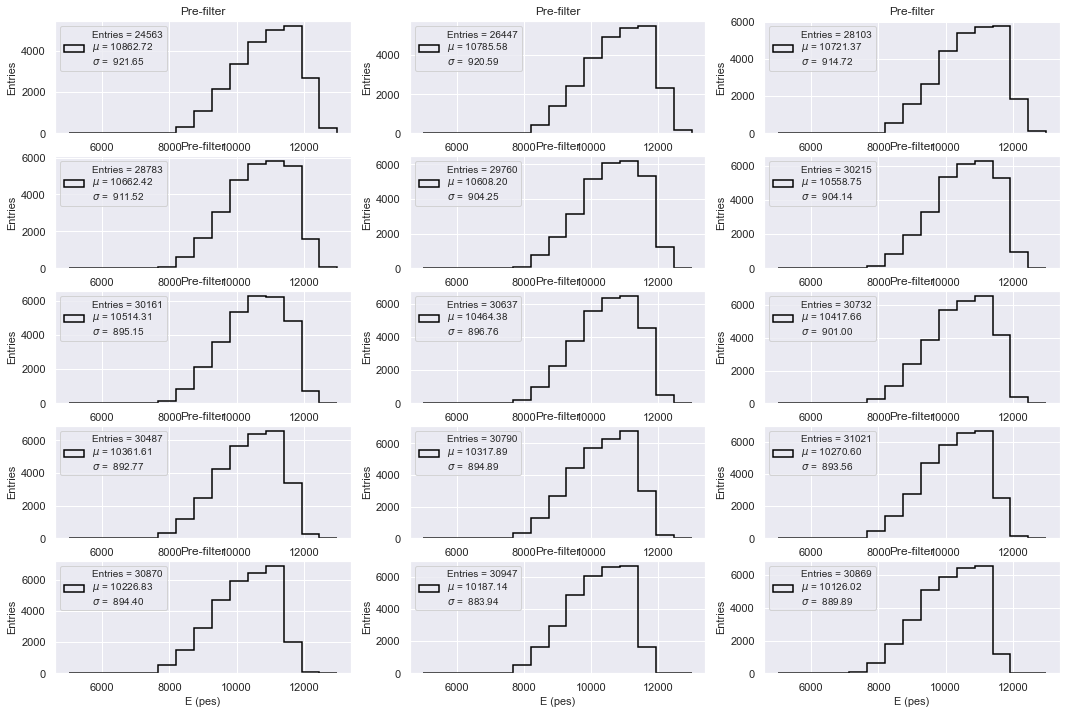

In [56]:
plot_energy_in_z_slices(dsts.Z, dsts.S2e, krNbins.Z, krRanges.Z, range_e=(5000, 13000))

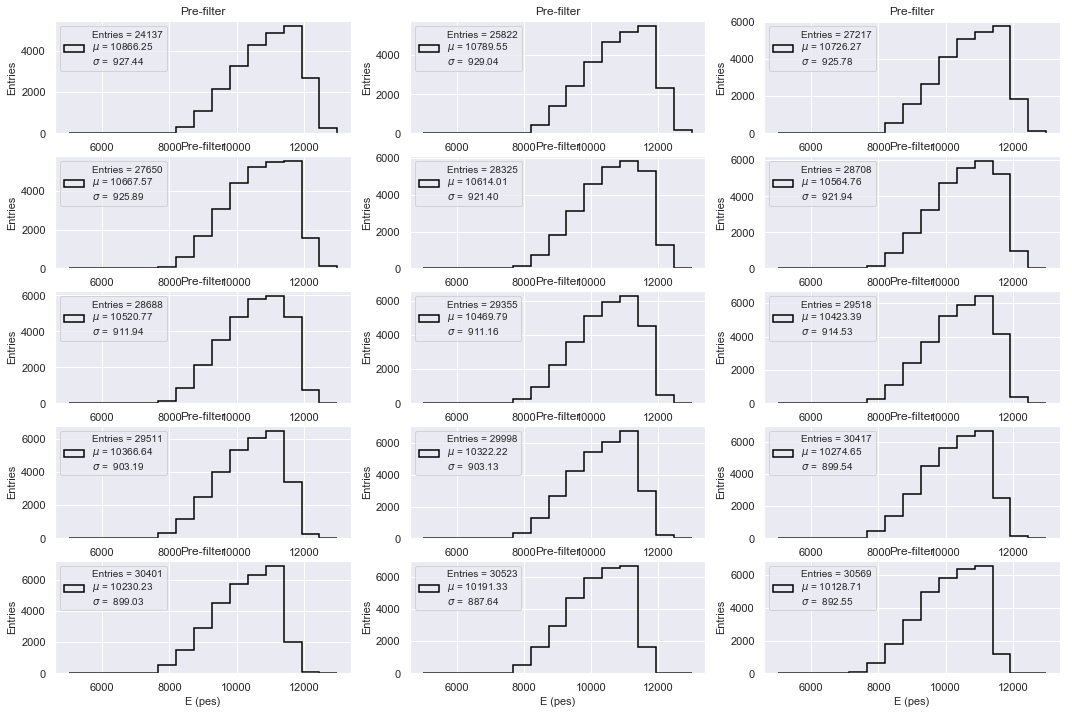

In [57]:
plot_energy_in_z_slices(dstf.Z, dstf.S2e, krNbins.Z, krRanges.Z, range_e=(5000, 13000))

## Divide chamber in sectors of XY

In [58]:
log.setLevel(logging.INFO) # turn to DEBUG to follow progress of this part 

In [59]:
ti = timeit(select_xy_sectors_df)
KXY = ti(dstf, krBins.X, krBins.Y)

Time spent in select_xy_sectors_df: 2.559264898300171 s


In [60]:
nXY = event_map_df(KXY)

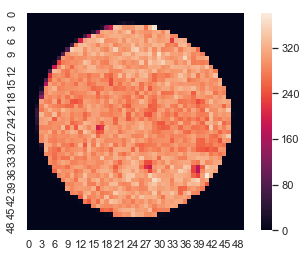

In [61]:
ax = sns.heatmap(nXY, square=True)

## Fits in XY sectors

## Maps

#### The first step is to fit a map XY (in time series) for the number of time bins required (in this case 1)

In [62]:
log.setLevel(logging.INFO)

In [63]:
ti = timeit(fit_map_xy_df)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fmxy = ti(selection_map = KXY,
              event_map      = nXY,
              n_time_bins    = 1,
              time_diffs     = DT,
              nbins_z        = krNbins.Z, 
              nbins_e        = krNbins.S2e, 
              range_z        = z_range, 
              range_e        = e_range,
              energy         = 'S2e',
              z              = 'Z',
              fit            = FitType.unbined,
              n_min          = 100)

Time spent in fit_map_xy_df: 5.406768083572388 s


#### The second step is to obtain the maps themselves from the fit-map-XY

In [64]:
ti = timeit(tsmap_from_fmap)
tsm = ti(fmxy)

Time spent in tsmap_from_fmap: 0.007436037063598633 s


#### Third step: select the corresponding map in the time series (in this case just one, ts=0)

In [65]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [66]:
log.setLevel(logging.INFO)

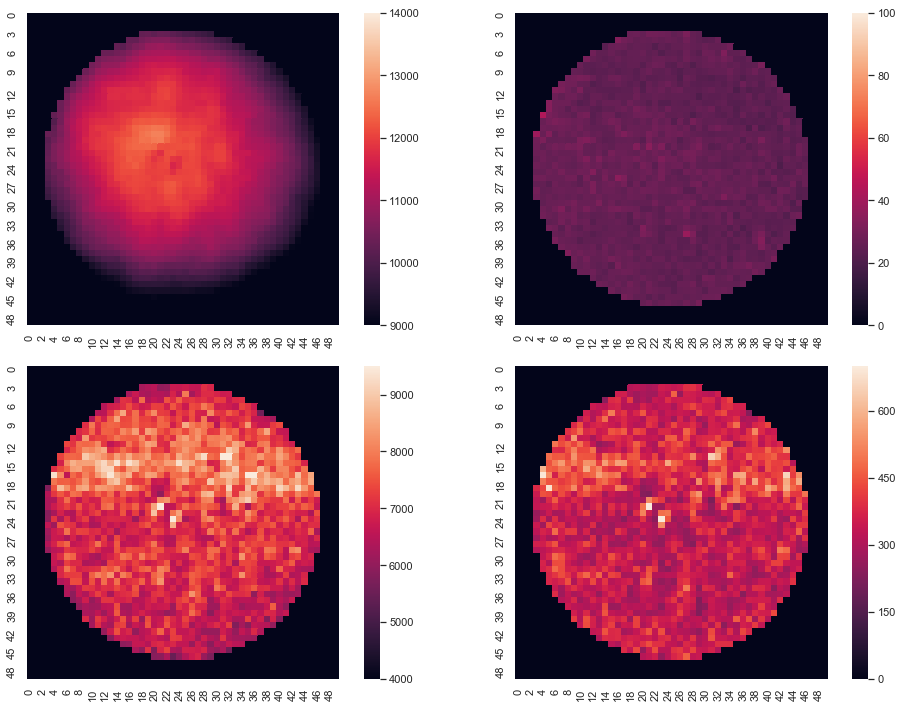

In [67]:
draw_xy_maps(am,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  100),
            lulims  = (0, 700),
            figsize=(14,10))

In [68]:
amap_average(am) 

ASectorMap(chi2=0.9132100146886244, e0=10761.297906480906, lt=7201.365430294962, e0u=26.164541947750422, ltu=366.311997250737, mapinfo=None)

#### Get rid of outlayers that distort mean and error

In [69]:
rmap = regularize_maps(am, erange=e_range, ltrange=(1000, 12000))

2019-08-20 17:49:00,518 | INFO :  set nans to average value of interval = 11500.0
2019-08-20 17:49:00,613 | INFO :  set nans to average value of interval = 6500.0


In [70]:
amap_average(rmap)

ASectorMap(chi2=0.9132100146886244, e0=10761.297906480906, lt=7201.365430294962, e0u=26.164541947750422, ltu=366.311997250737, mapinfo=None)

In [71]:
asm = relative_errors(rmap)

In [72]:
amv = amap_average(asm)
amv

ASectorMap(chi2=0.9132100146886244, e0=10761.297906480906, lt=7201.365430294962, e0u=0.24482975057719047, ltu=5.061690679435659, mapinfo=None)

#### Draw the maps using default colormap

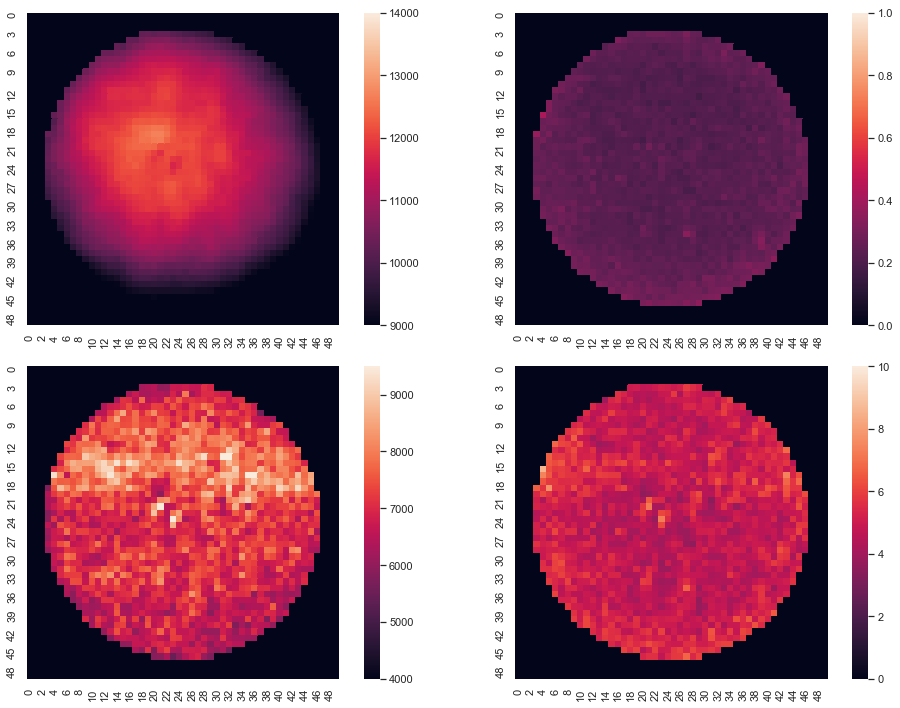

In [73]:
draw_xy_maps(asm,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

In [74]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)

In [75]:
amap_average(asmAv)

ASectorMap(chi2=0.9107318003974862, e0=10843.982644969567, lt=7218.443670731681, e0u=0.24262904468985277, ltu=5.0269049689802685, mapinfo=None)

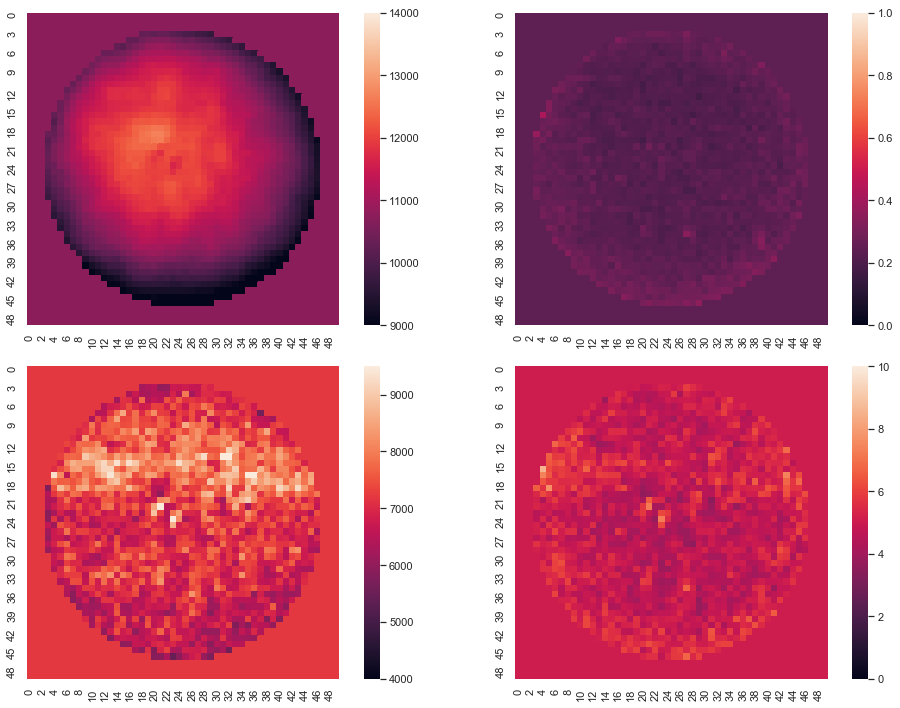

In [76]:
draw_xy_maps(asmAv,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

In [77]:
asm = add_mapinfo(asmAv, krRanges.X, krRanges.Y, krNbins.X, krNbins.Y, run_number=7439)

In [79]:
asm.mapinfo

xmin          -200
xmax           200
ymin          -200
ymax           200
nx              50
ny              50
run_number    7439
dtype: int64

In [80]:
write_maps(asm, filename=emap_filename2)

In [81]:
ti = timeit(fit_map_xy_df)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fmxy2 = ti(selection_map = KXY,
              event_map      = nXY,
              n_time_bins    = 1,
              time_diffs     = DT,
              nbins_z        = krNbins.Z, 
              nbins_e        = krNbins.S2e, 
              range_z        = z_range, 
              range_e        = s2q_range,
              energy         = 'S2q',
              z              = 'Z',
              fit            = FitType.unbined,
              n_min          = 50)

Time spent in fit_map_xy_df: 6.24467921257019 s


In [82]:
ti = timeit(tsmap_from_fmap)
tsm2 = ti(fmxy2)

Time spent in tsmap_from_fmap: 0.006721019744873047 s


In [83]:
am2 = amap_from_tsmap(tsm2, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [84]:
rmap2 = regularize_maps(am2, erange=(0,1000), ltrange=(0,10000))

2019-08-20 17:51:05,490 | INFO :  set nans to average value of interval = 500.0
2019-08-20 17:51:05,602 | INFO :  set nans to average value of interval = 5000.0


In [85]:
asm2 = relative_errors(rmap2)
amv2 = amap_average(asm2)
amv2

ASectorMap(chi2=0.958576161513133, e0=605.4696936764223, lt=3932.158015686939, e0u=0.7542332132532441, ltu=8.5568839738428, mapinfo=None)

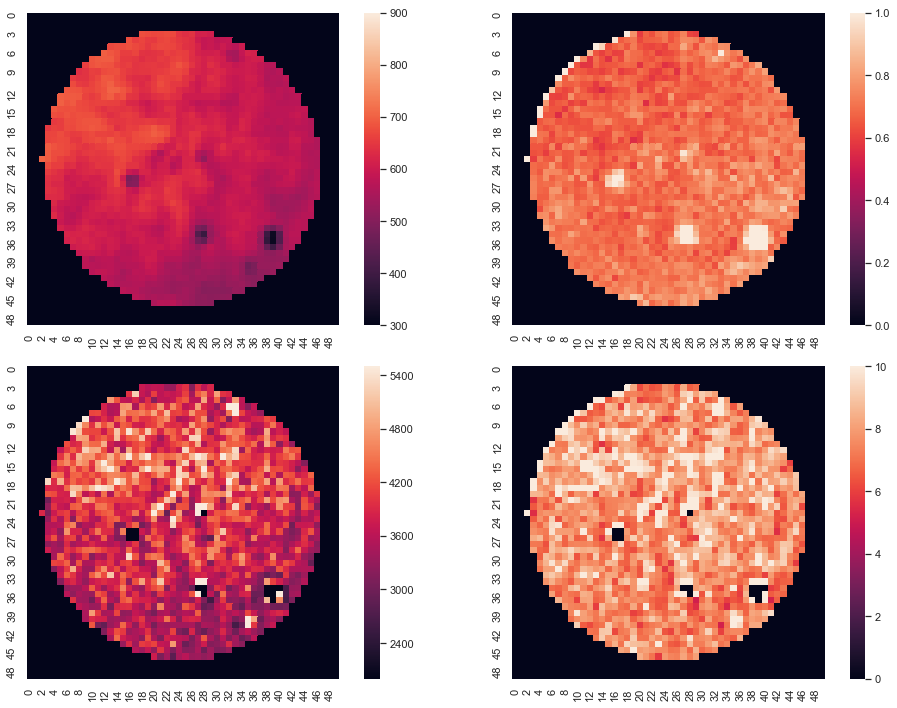

In [86]:
draw_xy_maps(asm2,
            e0lims  = (300, 900),
            ltlims  = (2000, 5500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

In [89]:
emaps = read_maps(filename=emap_filename2)

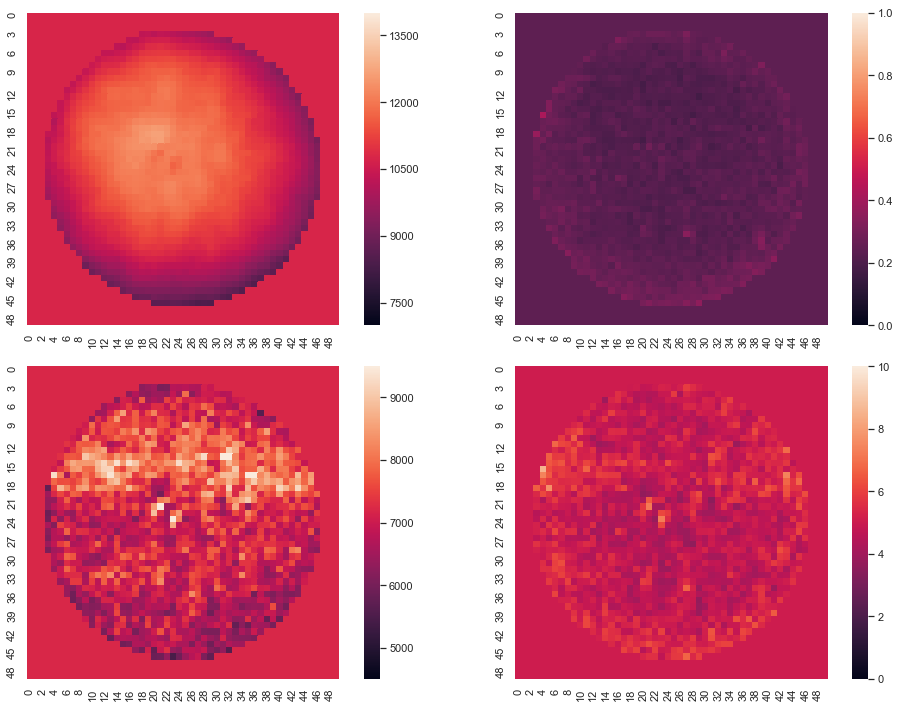

In [90]:
draw_xy_maps(emaps,
            e0lims  = (7000, 14000),
            ltlims  = (4500, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

## Now check the corrections that can be achieved with the single maps

In [91]:
amap_average(emaps)

ASectorMap(chi2=0.9107318003974862, e0=10843.982644969567, lt=7218.443670731681, e0u=0.24262904468985277, ltu=5.0269049689802685, mapinfo=None)

In [92]:
norm = amap_max(emaps)

In [93]:
norm

ASectorMap(chi2=2.7843905643266806, e0=12680.26012407015, lt=11500.769172217428, e0u=0.4246835358272835, ltu=8.520591337926433, mapinfo=None)

#### E0 correction:

In [99]:
ti = timeit(e0_xy_correction)
E0 = ti(dstf.S2e.values,
        dstf.X.values,
        dstf.Y.values,
        E0M = emaps.e0 / norm.e0, 
        xr  = krRanges.X,
        yr  = krRanges.Y,
        nx  = krNbins.X, 
        ny  = krNbins.Y)

Time spent in e0_xy_correction: 4.668964862823486 s


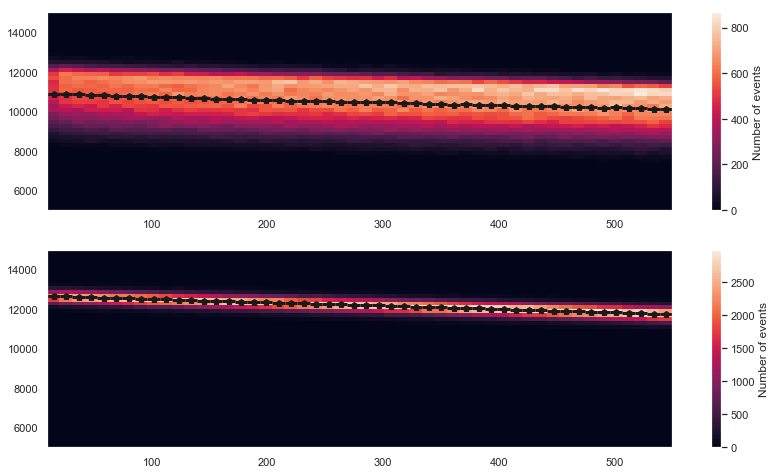

In [100]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(2, 1, 1)
nevt = h2(dstf.Z, dstf.S2e, 50, 50, krRanges.Z, (5000,15000), 
           profile=True)
ax      = fig.add_subplot(2, 1, 2)
nevt = h2(dstf.Z, E0, 50, 50, krRanges.Z, (5000,15000), 
           profile=True)

## XY (single time) LT correction

In [101]:
ti = timeit(lt_xy_correction)
E = ti(E0, 
       dstf.X.values, 
       dstf.Y.values,
       dstf.Z.values, 
       LTM = emaps.lt,
       xr  = krRanges.X,
       yr  = krRanges.Y,
       nx  = krNbins.X, 
       ny  = krNbins.Y)


Time spent in lt_xy_correction: 4.591562986373901 s


In [97]:
er = (5000,15000)

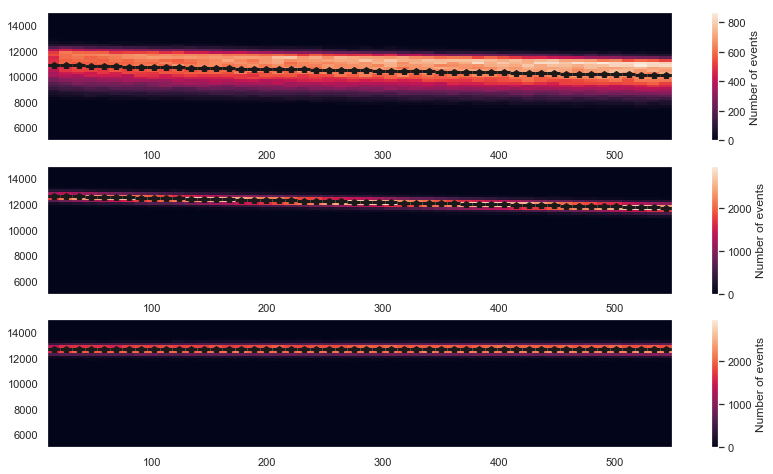

In [102]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(3, 1, 1)
nevt = h2(dstf.Z, dstf.S2e, 50, 50, krRanges.Z, er, 
           profile=True)
ax      = fig.add_subplot(3, 1, 2)
nevt = h2(dstf.Z, E0, 50, 50, krRanges.Z, er, 
           profile=True)
ax      = fig.add_subplot(3, 1, 3)
nevt = h2(dstf.Z, E, 50, 50, krRanges.Z, er, 
           profile=True)

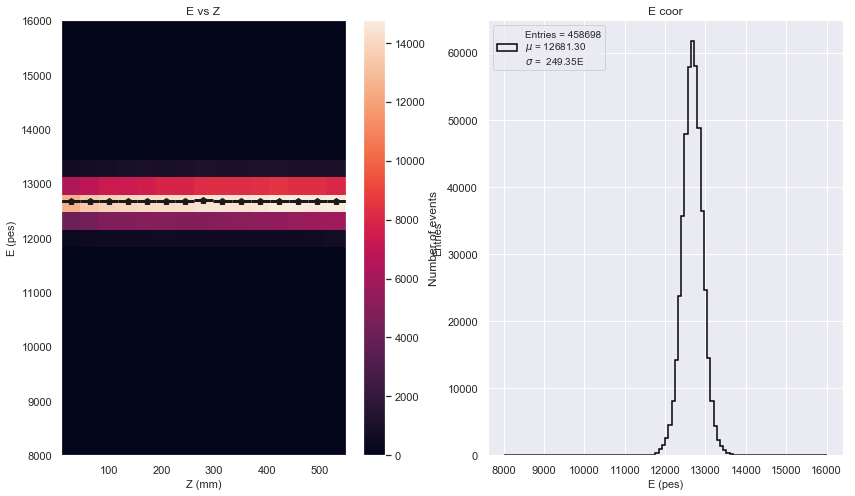

In [103]:
e_range = (8000,16000)
zrange = (10,550)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(dstf.Z, E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 12681.795560572535 +-0.36315191141183595 
 E sigma   = 240.36476793282776 +-0.28426523914828195 
 chi2    = 2.638261670662495 
 sigma E/E (FWHM)     (%) =4.454079092697849
 sigma E/E (FWHM) Qbb (%) =0.5752530285331728 


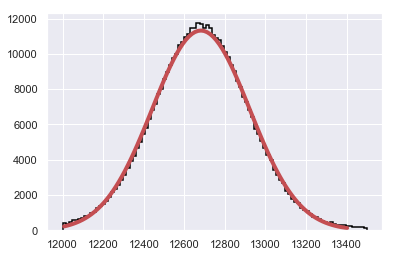

In [104]:
fc = fit_energy(E, nbins=100, range=(12000, 13500))
plot_fit_energy(fc)
print_fit_energy(fc)

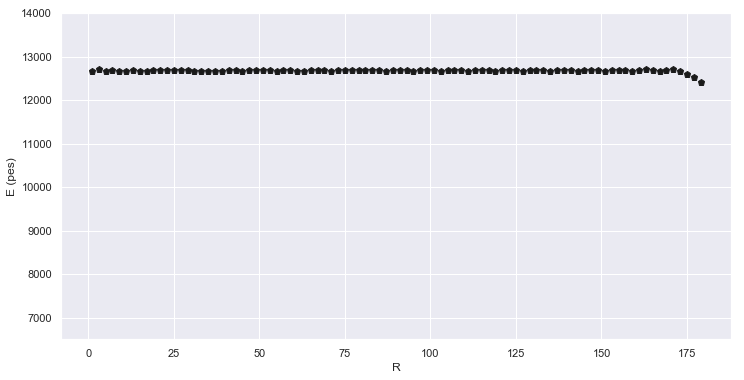

In [106]:
energy_X_profile(dstf.R, E, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=(6500, 14000),  
                 figsize=(12,6))

### Select events in the region

- R < 180
- 10 < z < 550
- 11000 < E < 13500

In [108]:
dstf = dstf.assign(E=E)

In [109]:
RFID2 = 170
dst_R     = dstf[dstf.R < RFID2]

### Repeat profles

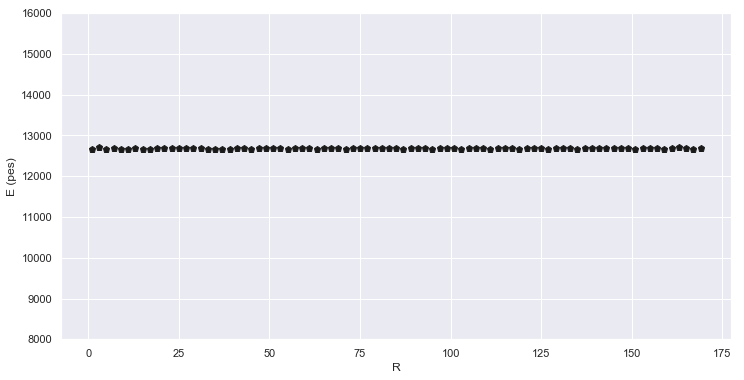

In [110]:
energy_X_profile(dst_R.R, dst_R.E, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=e_range,  
                 figsize=(12,6))

#### Everything is flat. No need for further corrections. 

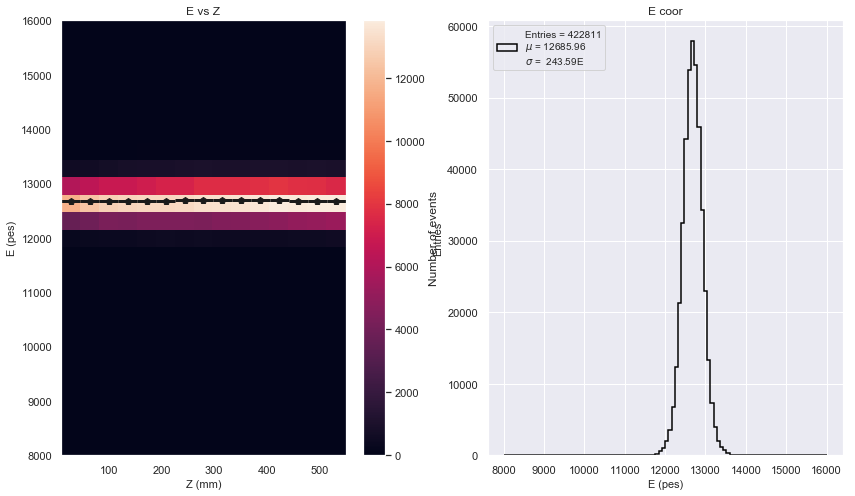

In [111]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(dst_R.Z, dst_R.E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(dst_R.E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 12685.84421020112 +-0.37033402636044177 
 E sigma   = 235.99218356354817 +-0.28768207820129604 
 chi2    = 2.654609850031175 
 sigma E/E (FWHM)     (%) =4.371657275503827
 sigma E/E (FWHM) Qbb (%) =0.5646080895971312 


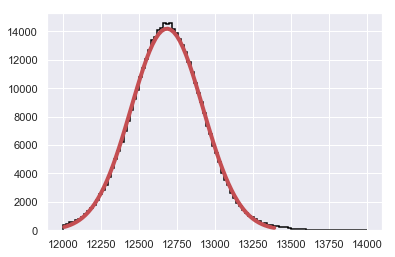

In [112]:
fc = fit_energy(dst_R.E, nbins=100, range=(12000, 14000))
plot_fit_energy(fc)
print_fit_energy(fc)

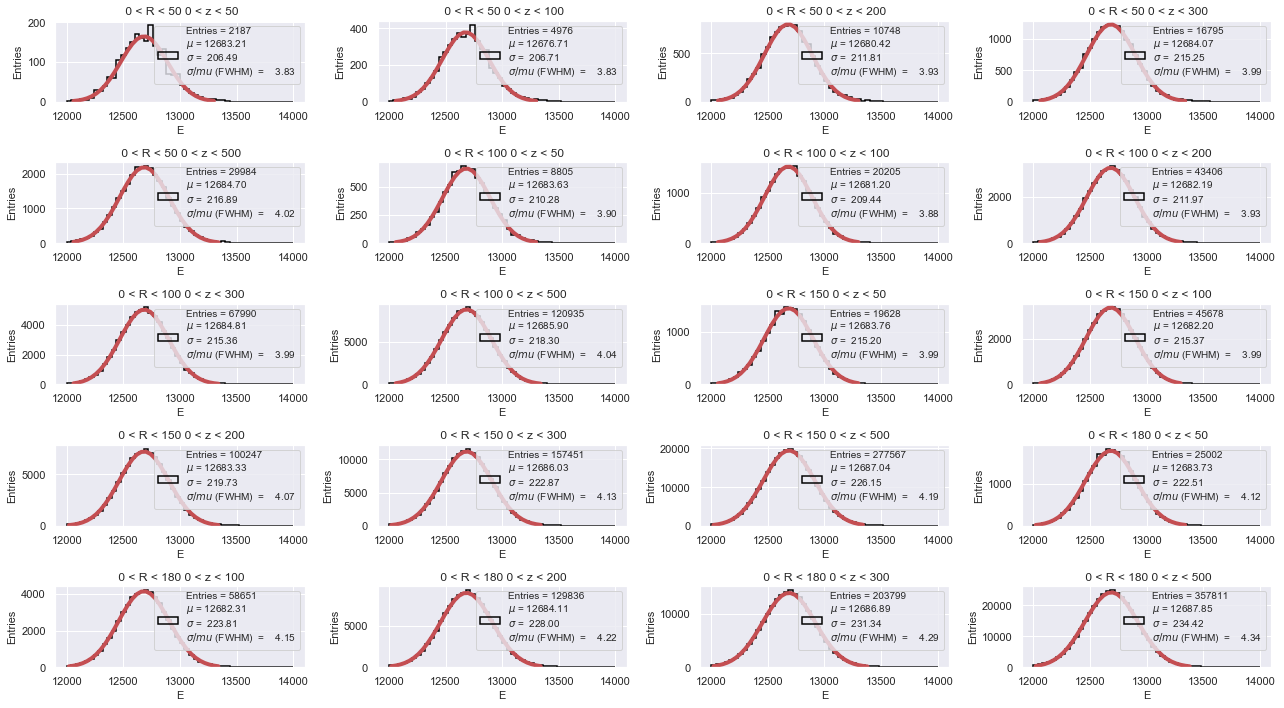

In [113]:
Ri = (50, 100,150,180)
Zi = (50, 100,200,300,500)

FC, FCE = resolution_r_z(Ri, Zi, dst_R.R, dst_R.Z, dst_R.E,
                    enbins = 50,
                    erange = (12000,14000),
                    ixy = (5,4),
                    fdraw  = True,
                    fprint = False,
                    figsize = (18,10)) 

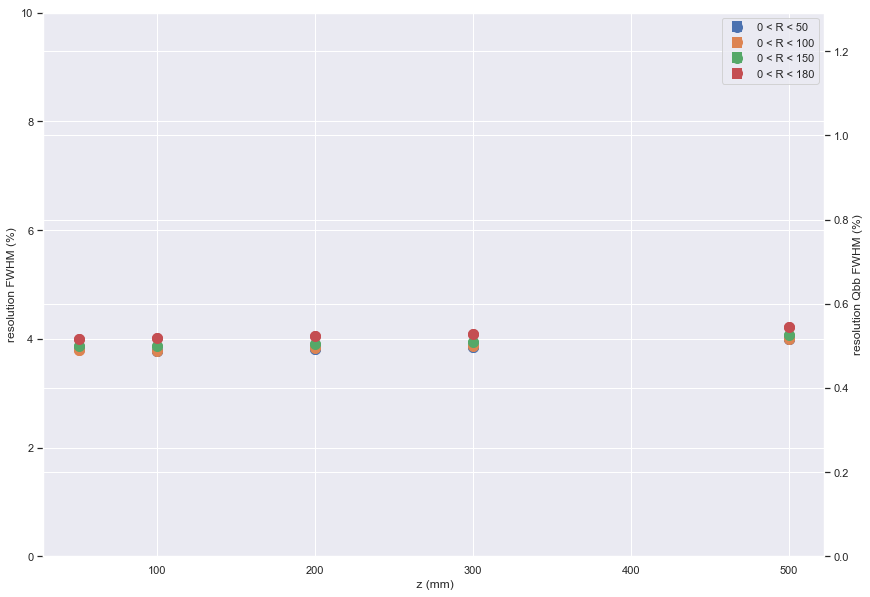

In [190]:
plot_resolution_r_z(Ri, Zi, FC, FCE, r_range=(0,10))

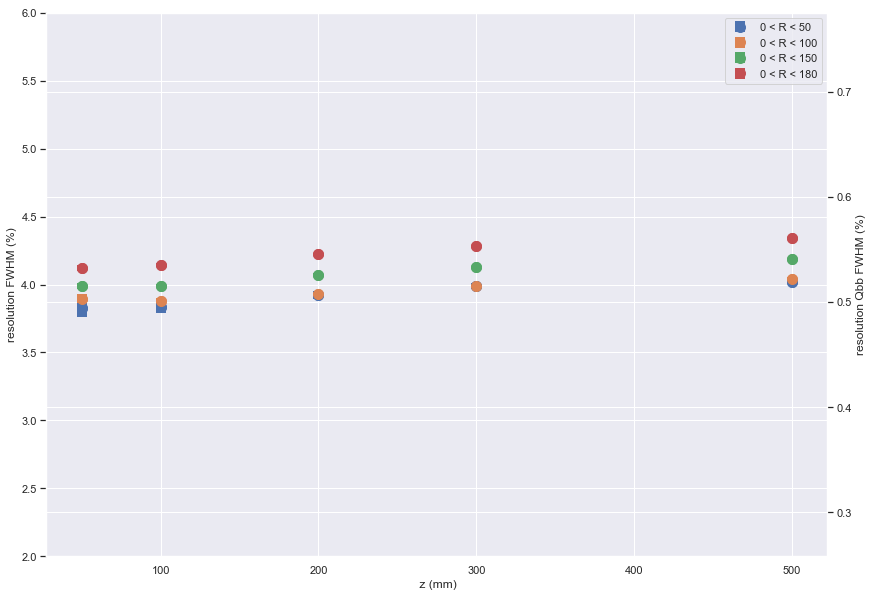

In [115]:
plot_resolution_r_z(Ri, Zi, FC, FCE, r_range=(2,6))

In [ ]:
if (write_filtered_dst):
    print('writing filtered dst ', output_dst_filename)
    kdst_write(dstf, output_dst_filename)

writing filtered dst  /Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7439_trigger1_0000_8952.h5
